# Final DL Model

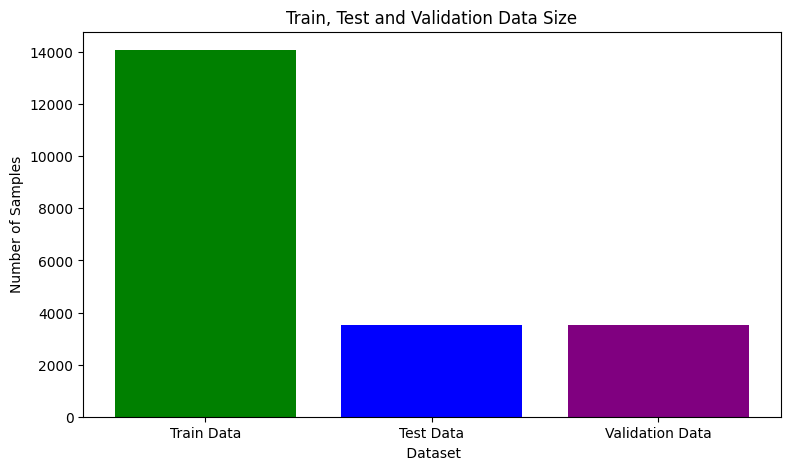

In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
X = df['Text']
# Use the 'label' column for labels
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Handle missing values in 'Text' column
df['Text'] = df['Text'].fillna('')  # Replace NaN with empty strings

# Train, Test and Validation test data size
train_size = len(X_train)
test_size = len(X_test)
validation_size = len(X_test)

plt.figure(figsize=(9, 5))
plt.bar(['Train Data', 'Test Data', 'Validation Data'], [train_size, test_size, validation_size], color=['green', 'blue', 'purple'])
plt.title('Train, Test and Validation Data Size')
plt.xlabel(' Dataset')
plt.ylabel('Number of Samples')
plt.show()

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Input, Flatten, SpatialDropout1D, Bidirectional, Reshape
from sklearn.metrics import accuracy_score, classification_report
df= pd.read_csv("/content/dataset.csv")
# Use the 'Text' column for text data# Use TfidfVectorizer for the 'Tokens' column
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Text'])

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handle class imbalance by converting labels to one-hot encoding
y_categorical = to_categorical(y_encoded)

In [6]:
# Define CNN model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_tfidf.shape[1],)))
model.add(Reshape((512, 1)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32,kernel_size=5,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten()) # Flatten the output from MaxPooling1D
model.add(Dense(64, activation='relu'))

model.add(Dense(2, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)

# Sort the indices of the sparse matrix
X_tfidf.sort_indices()

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y_categorical, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {accuracy:.3f}')

Epoch 1/15
440/440 [==============================] - 150s 335ms/step - loss: 0.6470 - accuracy: 0.6267 - val_loss: 0.5892 - val_accuracy: 0.6838
Epoch 2/15
440/440 [==============================] - 130s 295ms/step - loss: 0.4577 - accuracy: 0.7828 - val_loss: 0.6094 - val_accuracy: 0.6747
Epoch 3/15
440/440 [==============================] - 133s 302ms/step - loss: 0.2133 - accuracy: 0.9106 - val_loss: 0.9300 - val_accuracy: 0.6474
Epoch 4/15
440/440 [==============================] - 132s 299ms/step - loss: 0.0980 - accuracy: 0.9563 - val_loss: 1.0534 - val_accuracy: 0.6599
Epoch 5/15
440/440 [==============================] - 132s 301ms/step - loss: 0.0615 - accuracy: 0.9712 - val_loss: 1.2374 - val_accuracy: 0.6557
Epoch 6/15
110/110 [==============================] - 1s 10ms/step - loss: 1.4391 - accuracy: 0.6659
Validation accuracy: 0.666


# Ploting the Confusion Matrix and Classification Report of best Model

110/110 [==============================] - 1s 9ms/step
confusion Matrix:
 [[1556  538]
 [ 638  788]]


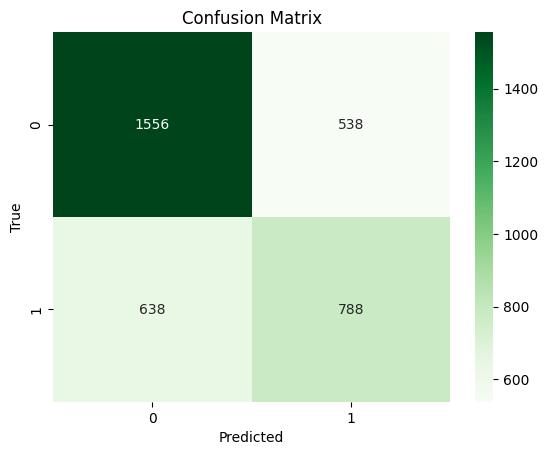

In [7]:
# Predict probabilities on the validation set
y_pred_probs = model.predict(X_val)

# Get predicted labels (class with highest probability)
y_pred = np.argmax(y_pred_probs, axis=1)

# Inverse transform encoded true labels to original form
y_val_original = np.argmax(y_val, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_val_original, y_pred)
print("confusion Matrix:\n", cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [8]:

# Extracting metrics separately
print("Accuracy:", accuracy_score(y_val_original, y_pred))
print("Classification Report:\n", classification_report(y_val_original, y_pred))

accuracy = accuracy_score(y_val_original, y_pred)

classification_report_dict = classification_report(y_val_original, y_pred, output_dict=True)
precision = classification_report_dict['weighted avg']['precision']
recall = classification_report_dict['weighted avg']['recall']
f1_score = classification_report_dict['weighted avg']['f1-score']


Accuracy: 0.6659090909090909
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73      2094
           1       0.59      0.55      0.57      1426

    accuracy                           0.67      3520
   macro avg       0.65      0.65      0.65      3520
weighted avg       0.66      0.67      0.66      3520

